### What variables are we focusing on in this assignment?
- some of the variables we're interested in, specificially, are
  - **toa_sw_all_mon**: outgoing shortwave (solar) radiative flux (leaving the top of the atmosphere) 
  - **toa_lw_all_mon**: outgoing longwave radiative flux (leaving the top of the atmosphere)
  - **toa_net_all_mon**: net radiative flux at the top of the atmosphere 
  - **solar_mon**:  incoming shortwave (solar) radiative flux at the top of the atmosphere
- more details to follow when needed!

In [1]:
import xarray as xr
import cartopy.crs as ccrs # Cartopy map projections
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
import numpy as np

data = xr.open_dataset('https://opendap.larc.nasa.gov/opendap/CERES/EBAF/TOA_Edition4.1/CERES_EBAF-TOA_Edition4.1_200003-202203.nc')
print(data)

<xarray.Dataset> Size: 792MB
Dimensions:                        (lon: 360, lat: 180, ctime: 12, sc: 2,
                                    time: 265)
Coordinates:
  * lon                            (lon) float32 1kB 0.5 1.5 2.5 ... 358.5 359.5
  * lat                            (lat) float32 720B -89.5 -88.5 ... 88.5 89.5
  * ctime                          (ctime) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
  * time                           (time) datetime64[ns] 2kB 2000-03-15 ... 2...
Dimensions without coordinates: sc
Data variables: (12/67)
    climatology_bounds             (ctime, sc) int32 96B ...
    toa_sw_all_mon                 (time, lat, lon) float32 69MB ...
    toa_lw_all_mon                 (time, lat, lon) float32 69MB ...
    toa_net_all_mon                (time, lat, lon) float32 69MB ...
    toa_sw_clr_c_mon               (time, lat, lon) float32 69MB ...
    toa_lw_clr_c_mon               (time, lat, lon) float32 69MB ...
    ...                             ...
    gtoa_n

#### Time for additional practice with accessing elements and taking means!

#### Let's look at radiative fluxes over ~ the state of Illinois (very roughly -92W to -87W, 37N to 43N).  Again, you can use built-in Xarray plotting or directly through Matplotlib


**HINTS**

*Hint 1*: You can average over more than one dimension via the dim argument in mean (or you can take the mean of a mean) - dim=['firstdim','seconddim'], etc.

In [9]:
# (a.) Access outgoing longwave radiation over the state of Illinois for July 2017 using sel and
# save to a new variable called ill_2017

#  Then, plot this data on a map, that includes state lines 

ill_2017 = data['toa_lw_all_mon'].sel(lat=slice(37,43), lon=slice(-92+360, -87+360), time='2017-07-15')
ill_2017

<xarray.DataArray 'toa_lw_all_mon' (lat: 6, lon: 5)> Size: 120B
array([[268.3, 266.2, 264.3, 264.2, 263.4],
       [264.7, 264.4, 261.1, 259.7, 259.3],
       [262.2, 260.5, 258.9, 258.1, 254.3],
       [259.4, 256.9, 256.5, 255.7, 253.8],
       [257.2, 254.6, 253.6, 253.6, 252.6],
       [255.2, 252.4, 250.8, 250.8, 251.2]], dtype=float32)
Coordinates:
  * lon      (lon) float32 20B 268.5 269.5 270.5 271.5 272.5
  * lat      (lat) float32 24B 37.5 38.5 39.5 40.5 41.5 42.5
    time     datetime64[ns] 8B 2017-07-15
Attributes:
    long_name:      Top of The Atmosphere Longwave Flux, All-Sky conditions, ...
    standard_name:  TOA Longwave Flux - All-Sky
    CF_name:        toa_outgoing_longwave_flux
    comment:        none
    units:          W m-2
    valid_min:      0.0
    valid_max:      400.0

Text(0.5, 1.0, 'Outgoing Longwave Radiative Flux for July 2017')

/global/homes/d/dbrooks/.conda/envs/myenv/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/global/homes/d/dbrooks/.conda/envs/myenv/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


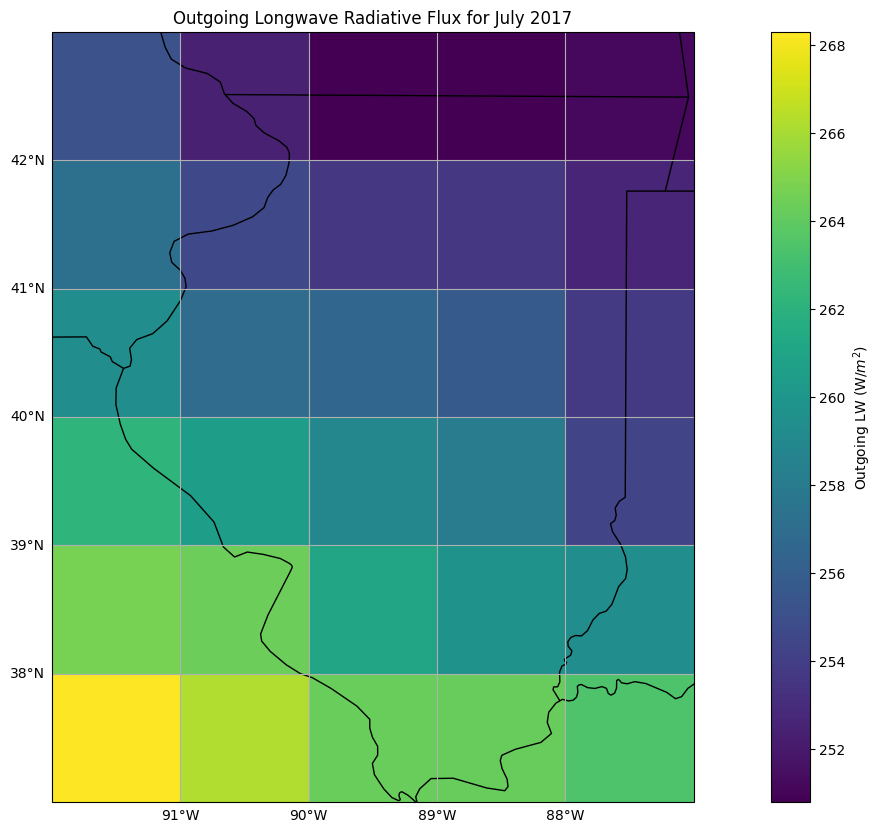

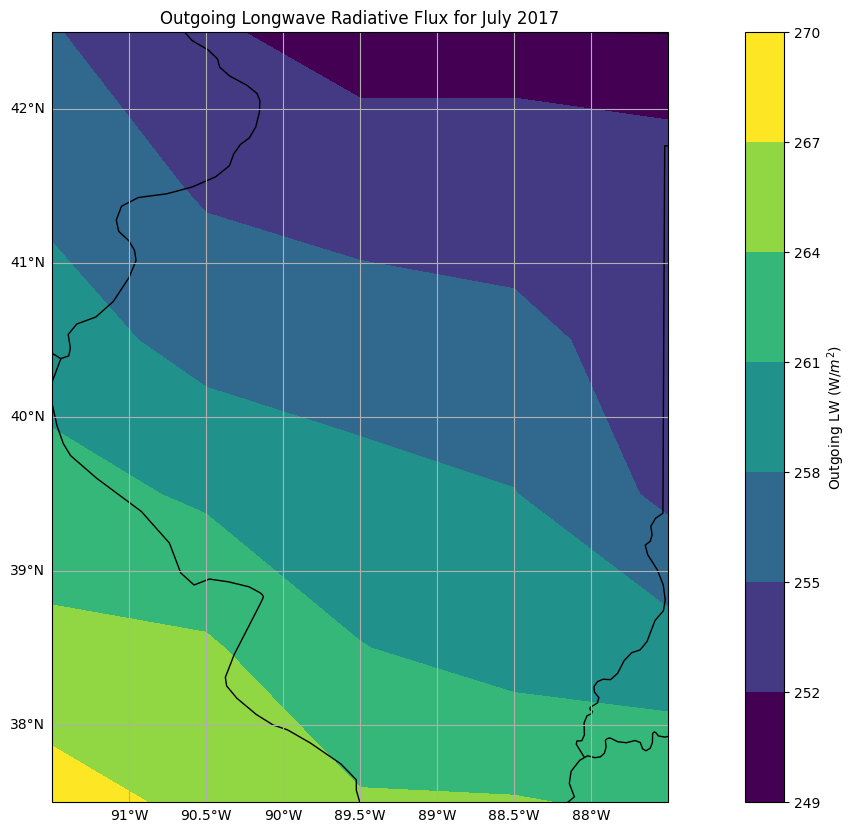

In [4]:
#*******************************
# Xarray shortcut to Matplotlib 
# This uses pcolormesh for 2D plotting, which is different than the contourf we often use in Matplotlib (it's another option
# in Matplotlib)
# Our mapping boundaries cut through grid cells, so we'd 
# Need to get smarter with that and/or cropping
#********************************

fig,ax= plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()),figsize=(20,10))
                     
ill_2017.plot(ax=ax,cbar_kwargs={'label': 'Outgoing LW (W/$m^2$)'})

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='black')

gl = ax.gridlines(draw_labels=True)
gl.right_labels= False
gl.top_labels=False

ax.set_title('Outgoing Longwave Radiative Flux for July 2017')

#*******************************
# Xarray shortcut to Matplotlib 
# But specifying contourf
# A bit different, yes?
#********************************

fig,ax= plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()),figsize=(20,10))
                     
ill_2017.plot.contourf(ax=ax,cbar_kwargs={'label': 'Outgoing LW (W/$m^2$)'})

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='black')

gl = ax.gridlines(draw_labels=True)
gl.right_labels= False
gl.top_labels=False

ax.set_title('Outgoing Longwave Radiative Flux for July 2017')

In [7]:
# (b.) Take the average of outgoing longwave radiation over the state of Illinois over time only (not spatial average) 
# and save to a new variable called ill_avg

#  Then, plot this data on a map, that includes state lines 


ill_avg = data['toa_lw_all_mon'].sel(lat=slice(37,43),lon=slice(-92+360, -87+360)).mean(dim='time')
ill_avg

<xarray.DataArray 'toa_lw_all_mon' (lat: 6, lon: 5)> Size: 120B
array([[236.01628, 236.05014, 236.11934, 235.8019 , 235.72784],
       [234.6894 , 234.81241, 234.37694, 233.99771, 233.8399 ],
       [232.89514, 232.62683, 232.28119, 231.98416, 231.69814],
       [231.00827, 230.71886, 230.62035, 230.20515, 229.81204],
       [229.23746, 229.07582, 228.82265, 228.87067, 229.16042],
       [227.48566, 227.4037 , 227.19998, 227.31133, 227.99475]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 20B 268.5 269.5 270.5 271.5 272.5
  * lat      (lat) float32 24B 37.5 38.5 39.5 40.5 41.5 42.5

Text(0.5, 1.0, 'Average Outgoing Longwave Radiative Flux, 2000-2022')

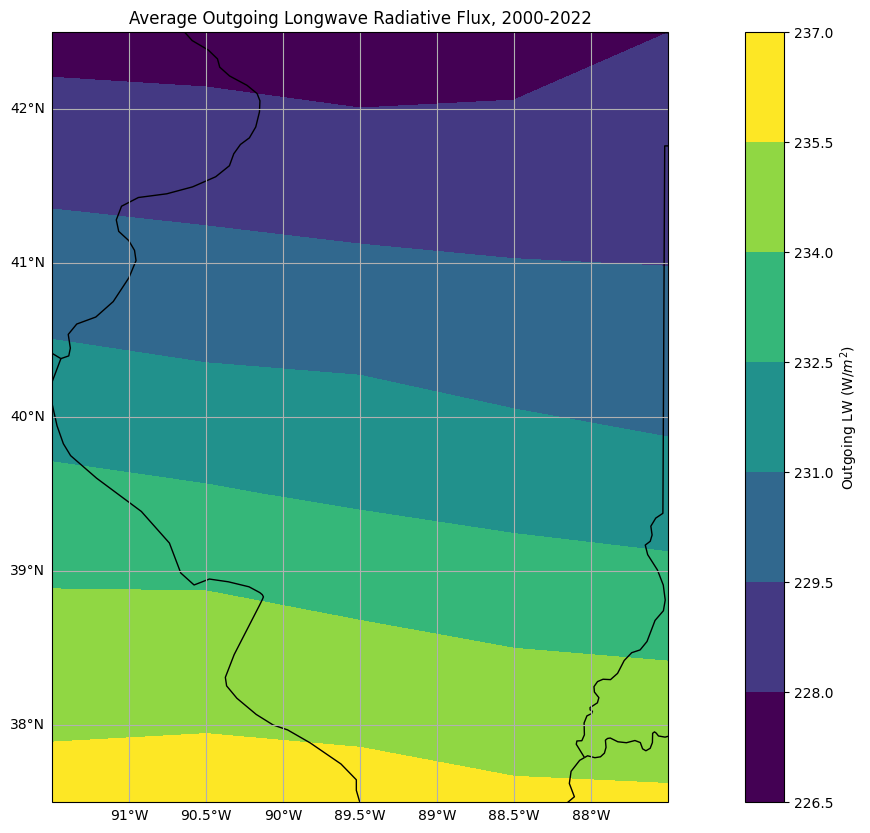

In [8]:
# (b.)

fig,ax= plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()),figsize=(20,10))
                     
ill_avg.plot.contourf(ax=ax,cbar_kwargs={'label': 'Outgoing LW (W/$m^2$)'})

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='black')

gl = ax.gridlines(draw_labels=True)
gl.right_labels= False
gl.top_labels=False

ax.set_title('Average Outgoing Longwave Radiative Flux, 2000-2022')

In [10]:
# (c.) As you'll see on your homework, averaging these radiation data spatially, without taking into account some 
# additional considerations, isn't quite right.  But you're going to do it anyway!  

# Average outgoing longwave radiation over the state of Illinois (but do not average over time, 
# just the spatial dimensions) and save to the variable ill_avg_spatial


ill_avg_spatial = data['toa_lw_all_mon'].sel(lat=slice(37,43),lon=slice(-92+360, -87+360)).mean(dim=['lon','lat'])
ill_avg_spatial

<xarray.DataArray 'toa_lw_all_mon' (time: 265)> Size: 1kB
array([227.17001, 228.77002, 229.71666, 241.9    , 253.59334, 254.54668,
       259.5433 , 240.94333, 216.07002, 201.20665, 211.68997, 203.46   ,
       217.28001, 230.75336, 226.49667, 248.05333, 251.96   , 258.28333,
       255.98335, 228.90999, 231.48335, 216.73334, 212.22333, 215.84001,
       203.82668, 228.87332, 225.62999, 251.97334, 260.14664, 251.96666,
       260.31665, 233.15334, 223.01001, 209.19998, 207.94333, 203.15335,
       220.12001, 233.91335, 234.66669, 245.90999, 262.81   , 263.25998,
       257.36   , 240.22667, 220.12668, 213.     , 206.98666, 211.04335,
       216.38998, 229.73666, 230.08333, 249.07666, 248.40334, 247.07668,
       270.75333, 232.24002, 216.23668, 212.36334, 200.97333, 213.46   ,
       216.3    , 231.34003, 240.19   , 258.88666, 260.97   , 255.20334,
       262.19666, 247.72336, 225.04332, 210.60667, 214.02002, 212.33333,
       211.96002, 232.97   , 231.94334, 248.18999, 259.34665, 250.83669,
       245.59   , 235.37999, 221.5    , 212.72333, 213.13998, 206.60666,
       215.67667, 232.04001, 237.51334, 248.37332, 255.37668, 258.0867 ,
       265.25003, 250.31665, 227.45   , 210.25665, 209.15666, 208.02   ,
       211.36668, 227.69667, 230.00334, 240.7    , 252.44333, 260.91666,
       250.20999, 243.41333, 224.00333, 202.2    , 207.23   , 217.58331,
       217.10333, 220.38333, 229.94667, 239.20001, 249.32666, 256.23666,
       253.14334, 219.45   , 230.08   , 206.47   , 205.91333, 207.24335,
...
       247.92   , 233.14665, 227.50333, 208.16998, 210.12999, 210.04666,
       211.32002, 219.84666, 227.75   , 240.15999, 258.44666, 258.63336,
       262.93997, 238.06998, 223.52998, 206.35   , 201.35332, 203.71335,
       216.62668, 218.13666, 227.68668, 235.23334, 258.98666, 246.43666,
       252.49667, 234.47334, 214.80002, 215.28331, 208.29335, 206.77333,
       215.65   , 229.49335, 225.73665, 230.02666, 242.68   , 255.26   ,
       254.17336, 240.47665, 224.85667, 213.84001, 213.66998, 216.48332,
       211.85667, 230.20001, 232.79332, 261.12335, 246.70334, 244.56999,
       256.23666, 243.09334, 232.77667, 210.26665, 206.56667, 214.25668,
       216.02333, 212.48999, 238.41002, 254.03   , 258.13   , 251.75665,
       262.06665, 239.22665, 224.12996, 209.43666, 207.46666, 196.22334,
       213.86667, 222.59666, 235.16   , 244.42668, 264.29   , 254.57332,
       254.19   , 236.48337, 212.47336, 210.97667, 203.60332, 205.17   ,
       213.28667, 217.02   , 220.80669, 235.38335, 259.06668, 247.32333,
       251.18666, 236.29666, 215.22   , 213.78001, 210.69998, 210.38002,
       213.04668, 227.53331, 231.98665, 253.23001, 258.28998, 263.54   ,
       253.04002, 236.33   , 236.50333, 214.58665, 209.26668, 206.17332,
       222.48   , 229.91667, 224.00667, 244.5    , 254.76001, 258.47336,
       260.87665, 238.55333, 221.55664, 216.06999, 207.20334, 209.79332,
       217.88667], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-03-15 2000-04-15 ... 2022-03-15

Text(0.5, 1.0, 'Average Outgoing Longwave Radiative Flux for ~ IL')

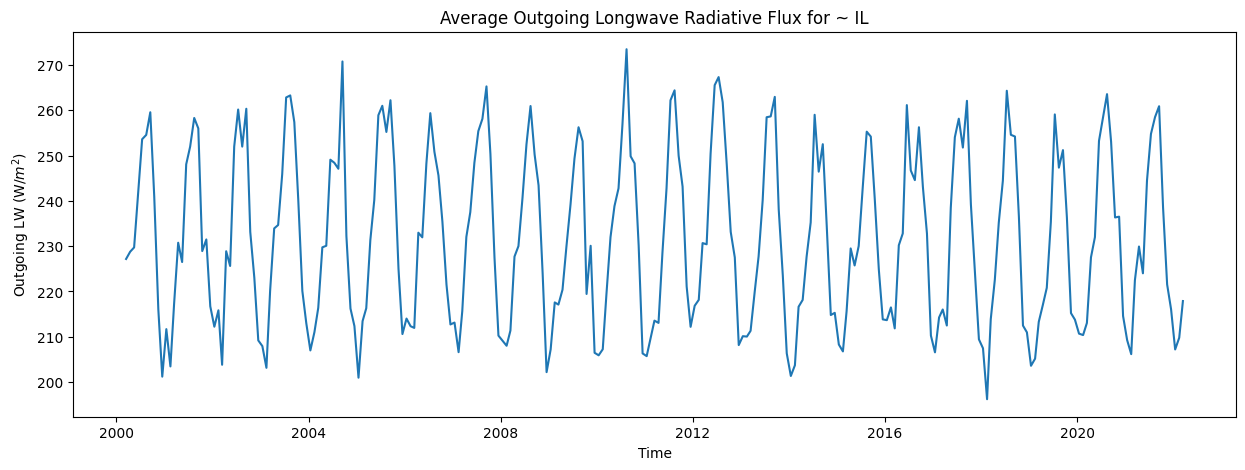

In [13]:
# (c.)
#*******************************
fig,ax= plt.subplots(figsize=(15,5))
                                                                  # take mean over both lat and lon!                     
ill_avg_spatial.plot.line(ax=ax)

ax.set_ylabel('Outgoing LW (W/$m^2$)')
ax.set_title('Average Outgoing Longwave Radiative Flux for ~ IL')

In [ ]:
# (d.)  Discuss for each (a.), (b.) + (c.) any distinct patterns or trend you notice in each plot
# In at least a sentence for each plot!

# a.) 


